<a href="https://colab.research.google.com/github/rockowtham/eip_class/blob/class3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

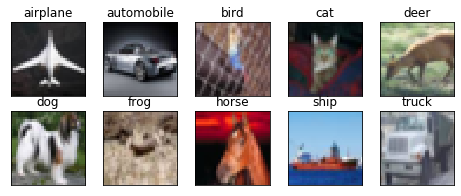

In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [16]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Ker

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 10s 25ms/step - loss: 1.8567 - acc: 0.2893 - val_loss: 1.4606 - val_acc: 0.4522
Epoch 2/50
390/390 [==============================] - 9s 24ms/step - loss: 1.3428 - acc: 0.5127 - val_loss: 1.1091 - val_acc: 0.6011
Epoch 3/50
390/390 [==============================] - 9s 24ms/step - loss: 1.1146 - acc: 0.6060 - val_loss: 0.9735 - val_acc: 0.6503
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9732 - acc: 0.6604 - val_loss: 0.9167 - val_acc: 0.6819
Epoch 5/50
390/390 [==============================] - 9s 24ms/step - loss: 0.8747 - acc: 0.6984 - val_loss: 0.7733 - val_acc: 0.7350
Epoch 6/50
390/390 [==============================] - 9s 24ms/step - loss: 0.7968 - acc: 0.7284 - val_loss: 0.8479 - val_acc: 0.7153
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7413 - acc: 0.7479 - val_loss: 0.7360 - val_acc: 0.7522
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

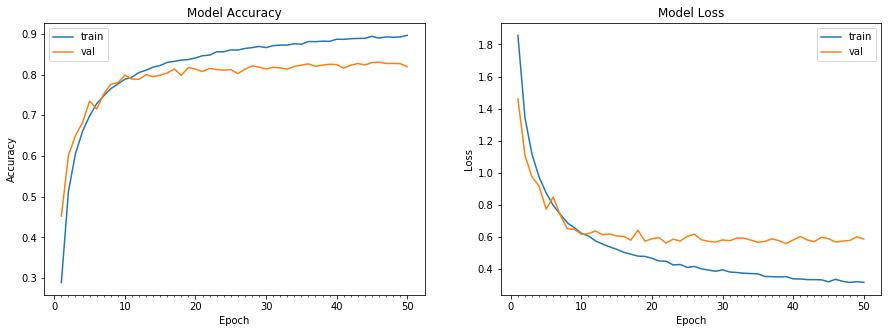

Accuracy on test data is: 81.91


In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model_1 = Sequential()
model_1.add(SeparableConv2D(filters=32, kernel_size=(3,3), padding='valid', strides = (1,1), depth_multiplier = 2, activation = 'relu', input_shape = (32, 32, 3)))# Output Size: 30,30,32 RF 3
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.1))

model_1.add(SeparableConv2D(filters=64, kernel_size=(3,3), use_bias= False, depth_multiplier = 2)) #Output Size: 28,28,63 RF: 5
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.1))

model_1.add(SeparableConv2D(filters=128, kernel_size=(3,3), use_bias= False, depth_multiplier = 2)) #Output Size: 26,26,128 RF: 7
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.1))

model_1.add(SeparableConv2D(filters=256, kernel_size=(3,3), use_bias= False, depth_multiplier = 1)) #Output Size: 24,24,256 RF: 8
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.1))

model_1.add(MaxPooling2D(pool_size=(2, 2))) #Output Size: 12,12,128 RF: 11
model_1.add(Dropout(0.1))



model_1.add(SeparableConv2D(filters=32, kernel_size=(3,3), use_bias= False, depth_multiplier = 1)) #Output Size: 10,10,32 RF: 20
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.1))

model_1.add(SeparableConv2D(filters=64, kernel_size=(3,3), use_bias= False, depth_multiplier = 1)) #Output Size: 8,8,64 RF: 28
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.1))

model_1.add(SeparableConv2D(128, kernel_size=(3, 3),  depth_multiplier=1))  # Output Size:6,6,32  RF:36

model_1.add(MaxPooling2D(pool_size=(2, 2))) # Output Size:3,3,32    RF 42
model_1.add(Dropout(0.1))
model_1.add(SeparableConv2D( 10,kernel_size=(3, 3)))  # Output Size:1,1,10    RF:50

model_1.add(Flatten())
# model.add(GlobalAveragePooling2D())
model_1.add(Dense(num_classes, activation='softmax')) 

# Compile the model
model_1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_17 (Separab (None, 30, 30, 32)        278       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_29 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_18 (Separab (None, 28, 28, 64)        4672      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_30 (Activation)   (None, 28, 28, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
390/390 [==============================] - 47s 119ms/step - loss: 1.4506 - acc: 0.4637 - val_loss: 2.0256 - val_acc: 0.4496
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0032744503.
390/390 [==============================] - 43s 109ms/step - loss: 1.0256 - acc: 0.6328 - val_loss: 1.0707 - val_acc: 0.6237
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0028315018.
390/390 [==============================] - 43s 109ms/step - loss: 0.8646 - acc: 0.6951 - val_loss: 1.0022 - val_acc: 0.6614
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0025329586000000003.
390/390 [==============================] - 43s 110ms/step - loss: 0.7755 - acc: 0.7265 - val_loss: 0.9419 - val_acc: 0.6839
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0023181019000000002.
390/390 [==============================] - 43s 109ms/step - los

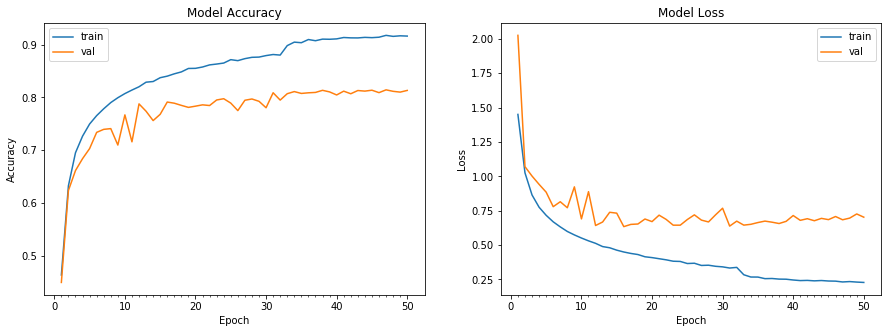

Accuracy on test data is: 81.31


In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch,lr):
  if(epoch % 10 < 5 | epoch>35 ):
    return round(0.003*1/(1 + 0.319*epoch),10)
  else:
    return 0.001 +  round(0.003*1/(1 + 0.319*epoch),10)


model_1.compile(loss = 'categorical_crossentropy',optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

# train the model
start = time.time()

# Train the model
model_info_1 = model_1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128,shuffle=False),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks = [LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info_1)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_1))